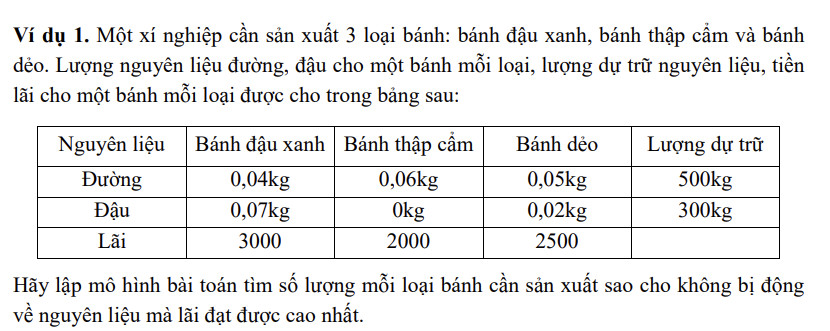

In [1]:
import cvxpy as cp
import numpy as np

(CVXPY) Oct 28 08:04:14 AM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Oct 28 08:04:14 AM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Oct 28 08:04:14 AM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: The specified module could not be found.')


các hệ số và giá trị lãi của mỗi loại bánh có thể được biểu thị bằng LaTeX như sau:


\begin{align*}
a &= 0.04 \text{ (kg đường/bánh đậu xanh)} \\
b &= 0.07 \text{ (kg đậu/bánh đậu xanh)} \\
c &= 3000 \text{ (đơn vị lãi/bánh đậu xanh)} \\
d &= 0.06 \text{ (kg đường/bánh thập cẩm)} \\
e &= 0 \text{ (kg đậu/bánh thập cẩm)} \\
f &= 2000 \text{ (đơn vị lãi/bánh thập cẩm)} \\
g &= 0.05 \text{ (kg đường/bánh dẻo)} \\
h &= 0.02 \text{ (kg đậu/bánh dẻo)} \\
i &= 2500 \text{ (đơn vị lãi/bánh dẻo)}
\end{align*}




**Ràng Buộc :**

    - Đường 
$$0.04x_1 + 0.06x_2 + 0.05x_3 <= 500$$
    
    - Đậu :
$$0.07x_1 + 0.02x_3 <= 300$$

    - Số lượng sp :
$$x_1,x_2,x_3 >= 0$$
**Hàm mục tiêu :**
$$Z = 3000x_1 + 2000x_2 + 2500x_3$$

            


In [31]:
import numpy as np
from scipy.optimize import minimize

# Hàm mục tiêu
def objective_function(vars):
    x, y, z, lambda1, lambda2 = vars
    return 3000*x + 2000*y + 2500*z + lambda1*(0.04*x + 0.06*y + 0.05*z - 500) + lambda2*(0.07*x + 0.02*z - 300)

# Hệ ràng buộc
def constraint1(vars):
    x, y, z, _, _ = vars 
    return 0.04*x + 0.06*y + 0.05*z - 500

def constraint2(vars):
    x, y, z, _, _ = vars 
    return 0.07*x + 0.02*z - 300

# Điều kiện KKT
def kkt_conditions(vars):
    x, y, z, lambda1, lambda2 = vars 
    
    # Stationarity
    stationarity = [3000*x + 0.04*lambda1 + 0.07*lambda2,
                    2000*y + 0.06*lambda1,
                    2500*z + 0.05*lambda1 + 0.02*lambda2,
                    0.04*x + 0.06*y + 0.05*z - 500,
                    0.07*x + 0.02*z - 300]
    
    # Primal feasibility
    primal_feasibility = [constraint1(vars),
                          constraint2(vars)]
    
    # Dual feasibility
    dual_feasibility = [lambda1, lambda2]
    
    # Complementary slackness
    complementary_slackness = [lambda1 * constraint1(vars),
                               lambda2 * constraint2(vars)]
    
    return stationarity + primal_feasibility + dual_feasibility + complementary_slackness

# Điểm xuất phát
initial_guess = [0, 0, 0, 0, 0]

# Ràng buộc
constraints = [{'type': 'eq', 'fun': constraint1},
               {'type': 'eq', 'fun': constraint2}]

# Giải bài toán tối ưu
result = minimize(objective_function, initial_guess, constraints=constraints)

# Hiển thị kết quả
print(f'Giá trị cực tiểu: {result.fun}')
print(f'Nghiệm cực tiểu: {result.x[:3]}')
kkt_result = kkt_conditions(result.x)

# Hiển thị kết quả Kiểm tra KKT
if all(condition <= 1e-6 for condition in kkt_result):
    print("Giải pháp thỏa mãn điều kiện KKT.")
else:
    print("Giải pháp không thỏa mãn điều kiện KKT.")

Giá trị cực tiểu: -3084869250532.484
Nghiệm cực tiểu: [ 1.22679149e+08  2.55692571e+08 -4.10079728e+08]
Giải pháp không thỏa mãn điều kiện KKT.


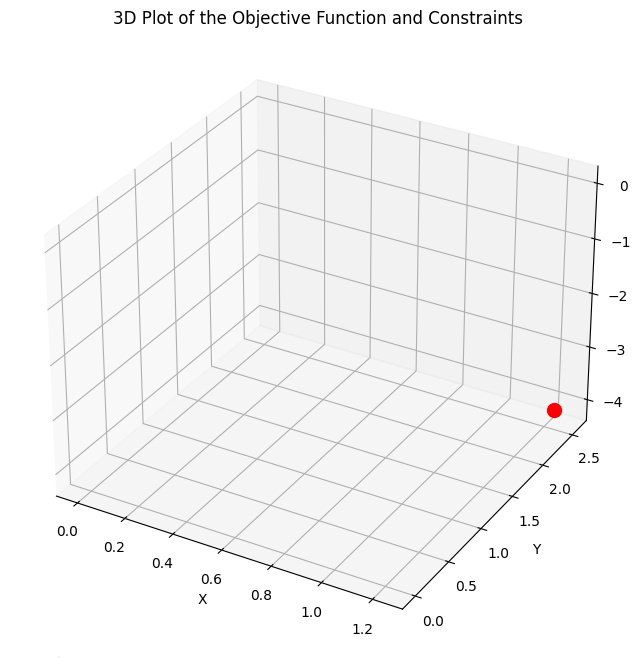

In [32]:
# Tạo dữ liệu
x_vals = np.linspace(0, 100, 100)
y_vals = np.linspace(0, 100, 100)

X, Y = np.meshgrid(x_vals, y_vals)
Z = objective_function([X, Y, 0, 0, 0])
Constraint1 = constraint1([X, Y, 0, 0, 0])
Constraint2 = constraint2([X, Y, 0, 0, 0])

# Vẽ đồ thị
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Hàm mục tiêu
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5, label='Objective Function')

# Ràng buộc
ax.plot_surface(X, Y, Constraint1, color='gray', alpha=0.3, label='Constraint 1')
ax.plot_surface(X, Y, Constraint2, color='gray', alpha=0.3, label='Constraint 2')

# Đánh dấu điểm cực tiểu
ax.scatter(result.x[0], result.x[1], result.x[2], color='red', s=100, label='Minimum Point')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of the Objective Function and Constraints')
# ax.legend()

plt.show()

In [2]:
c = np.array([3000,2000,2500])
A = np.array([[0.04,0.06,0.05],[0.07,0,0.02]])


In [3]:
b = np.array([500,300])

In [4]:
x = cp.Variable(3)

In [5]:
constraint = [A@x<=b, 
              x>=0]

In [6]:
prob = cp.Problem(cp.Maximize(c.T@x), constraint )
prob.solve()


26851851.84093243

In [7]:
print("Số lượng bánh đậu xanh cần sản xuất:", x[0].value)
print("Số lượng bánh thập cẩm cần sản xuất:", x[1].value)
print("Số lượng bánh dẻo cần sản xuất:", x[2].value)
print("\nThe optimal value is", prob.value)
# print("A solution x is")
# print(x.value)

Số lượng bánh đậu xanh cần sản xuất: 1851.8518530750416
Số lượng bánh thập cẩm cần sản xuất: 3.1647444044962115e-06
Số lượng bánh dẻo cần sản xuất: 8518.518510151125

The optimal value is 26851851.84093243


## Scipy

In [8]:
obj = [-3000,-2000,-2500]
lhs_ineq = [[0.04,0.06,0.05],[0.07,0,0.02]]
rhs_ineq =[500,300]


In [9]:
from scipy.optimize import linprog
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
               method="revised simplex")
# opt
opt.fun = -opt.fun
opt

C:\Users\Admin\AppData\Local\Temp\ipykernel_16172\1292219799.py:2: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,


     con: array([], dtype=float64)
     fun: 26851851.85185185
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([1851.85185185,    0.        , 8518.51851852])

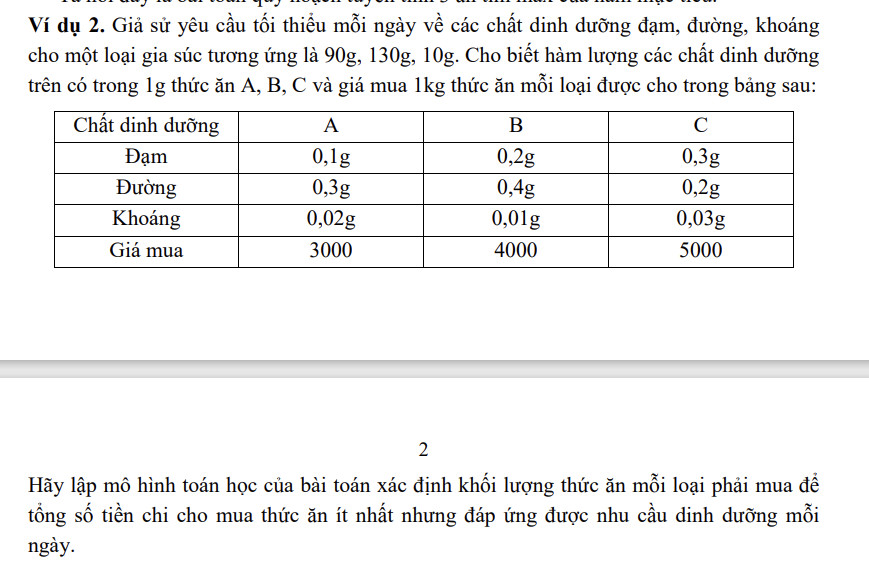
    

**Ràng Buộc :**
- Đạm:
$$0.1x_1 + 0.2x_2+0.3_x3 >=90$$

- Đường :
$$0.3x_1 + 0.4x_2+0.2x_3>=130$$

- Khoáng :
$$0.02x_1+0.01x_2+0.03x_3>=10$$

- các chất dinh dưỡng :
$$x_1 , x_2 , x_3 >=0$$

**Hàm mục tiêu :**
$$3000x_1 + 4000x_2 + 5000x_3$$

## Scipy

In [10]:
obj = [-3000,-4000,-5000]
lhs_ineq = [[0.1,0.2,0.3],[0.3,0.4,0.2],[0.02,0.01,0.03]]
rhs_ineq = [90,130,10]
from scipy.optimize import linprog
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
               method="revised simplex")
# opt
opt.fun = -opt.fun
opt

C:\Users\Admin\AppData\Local\Temp\ipykernel_16172\3361423617.py:5: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,


     con: array([], dtype=float64)
     fun: 1820000.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0., 0., 0.])
  status: 0
 success: True
       x: array([193.33333333,  93.33333333, 173.33333333])

In [11]:
c = np.array([3000,4000,5000])
A = np.array([[-0.1,-0.2,-0.3],[-0.3,-0.4,-0.2],[-0.02,-0.01,-0.03]])


In [12]:
b = np.array([-90,-130,-10])


In [13]:
x = cp.Variable(3)

In [14]:
constraint =[A@x<=b,x>=0]

In [15]:
prob = cp.Problem(cp.Minimize(c.T@x), constraint )
prob.solve()


1819999.9966886165

In [16]:
print( x[0].value)
print( x[1].value)
print( x[2].value)
print("\nThe optimal value is", prob.value)


193.3333371182396
93.3333301970174
173.33333290916562

The optimal value is 1819999.9966886165


In [17]:
from scipy.optimize import linprog


In [18]:
obj = [3000,4000,5000] # hàm mục tiêu
lhs_ineq = [[-0.1,-0.2,-0.3],[-0.3,-0.4,-0.2],[-0.02,-0.01,-0.03]] # subject 
rhs_ineq = [-90,-130,-10] # điều ki
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
               method="revised simplex")
opt
# opt.fun = -opt.fun
# opt

C:\Users\Admin\AppData\Local\Temp\ipykernel_16172\3788233397.py:4: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,


     con: array([], dtype=float64)
     fun: 1820000.000000001
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([4.26325641e-14, 8.52651283e-14, 1.77635684e-15])
  status: 0
 success: True
       x: array([193.33333333,  93.33333333, 173.33333333])

Here, we solve the following LPP:
$$\begin{matrix} \displaystyle \max{x_1,\ x_2} & z=x_1+x_2 \\
\text{subject to } & 4x_1+3x_2 \leq 12\\
& -3x_1+4x_2\leq 12 \\
& 0\leq (x_1,\ x_2 )\leq 2\end{matrix}$$

In [19]:
c = np.array([1,1])
A = np.array([[4,3],[-3,4]])
b = np.array([12,12])
x = cp.Variable(2)


In [20]:
constraint =[
    A@x<=b,
    x >=0 , x<=2
]

In [21]:
prob = cp.Problem(cp.Maximize(c.T@x), constraint )
prob.solve()

3.499999999929633

In [22]:
print(x[0].value)
print(x[1].value)
print(-prob.value)

1.5000000001986586
1.9999999997309743
-3.499999999929633


In [23]:
obj = [-1,-1] # max thì thay thành - hàm mục tiêu
lhs_ineq = [[4,3],[-3,4]]
rhs_ineq =[12,12]
bnd = [(0,float(2)),
       (0,float(2))]


In [24]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,bounds= bnd,
               method="revised simplex")
opt

C:\Users\Admin\AppData\Local\Temp\ipykernel_16172\4105358451.py:1: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,bounds= bnd,


     con: array([], dtype=float64)
     fun: -3.5
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0. , 8.5])
  status: 0
 success: True
       x: array([1.5, 2. ])

Here, we solve the following LPP:
$$\begin{matrix} \displaystyle \min_{x_1,\ x_2} & z=4x_1+2x_2 \\ 
\text{subject to} & 4x_1+3x_2 \leq 12 \\
& -3x_1 + 6x_2 \leq 10 \\
& x_1 \geq 1\\
& 0\leq x_1,\ \ x_2 \leq 5\end{matrix}$$

In [25]:
obj = [4,2]
lhs_ineq= [[4,3],[-3,6]]
rhs_ineq= [12,10]
bnd = [(float(1),float(5)),(float(0),float(5))]


In [26]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,bounds= bnd,
               method="revised simplex")
opt

C:\Users\Admin\AppData\Local\Temp\ipykernel_16172\4105358451.py:1: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,bounds= bnd,


     con: array([], dtype=float64)
     fun: 4.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([ 8., 13.])
  status: 0
 success: True
       x: array([1., 0.])

In [27]:
# cvxpy
c = np.array([4,2])
A = np.array([[4,3],[-3,6]])  
b = np.array([12,10])
x= cp.Variable(2)
 


In [28]:
constraint = [
    A @ x <= b,
    x >= np.array([1, 0]),
    x <= np.array([5, 5])
]

In [29]:
prob = cp.Problem(cp.Minimize(c.T@x), constraint )
prob.solve()

4.000000000356874

In [30]:
print(x[0].value)
print(x[1].value)
print(prob.value)

1.0000000000619125
5.461178032341276e-11
4.000000000356874


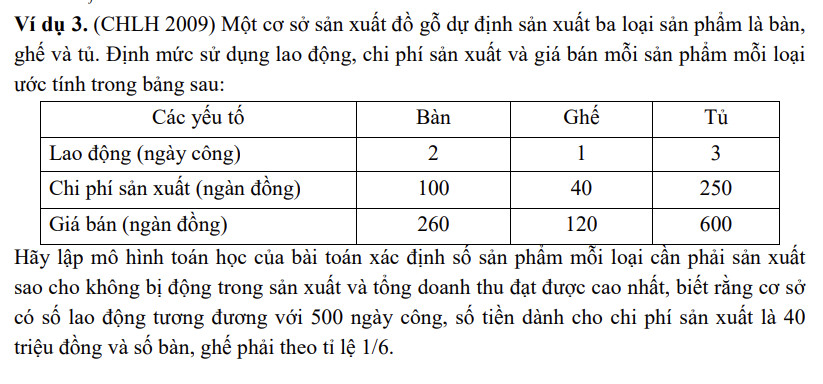

- Lao động :
$$2x_1 + 1x_2+3x_3<=500$$
- Chi phí:
$$100x_1 + 40x_2 + 250x_3<=40000$$

$$x_1 / x_2 = 1/6 => 6x_1 = x_2$$
- Hàm mục tiêu :
$$Z = 260x_1 + 120x_2 + 600x_3$$

In [31]:
c = np.array([260,120,600])
A= np.array([[2,1,3],[100,40,250]])
b = np.array([500,40000])
x = cp.Variable(3)


In [32]:
constraint = [ A@x<=b, x>=0,
              6*x[0]==x[1]
]

In [33]:
prob = cp.Problem(cp.Maximize(c.T@x), constraint )
prob.solve()

96836.7346491086

In [34]:
print(x[0].value)
print(x[1].value)
print(x[2].value)
print(prob.value)

5.102040620694932
30.61224372417045
153.06122473471245
96836.7346491086


In [35]:
obj = [-260,-120,-600]
lhs_ineq= [[2,1,3],[100,40,250]]
rhs_ineq= [500,40000]
lhs_eq = [[6,-1,0]]
rhs_eq = [0]

In [36]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
               A_eq=lhs_eq, b_eq=rhs_eq,
               method="revised simplex")
opt.fun = -opt.fun 
opt

C:\Users\Admin\AppData\Local\Temp\ipykernel_16172\3566300514.py:1: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,


     con: array([3.55271368e-15])
     fun: 96836.73469387754
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([5.68434189e-14, 0.00000000e+00])
  status: 0
 success: True
       x: array([  5.10204082,  30.6122449 , 153.06122449])

## Gradient Descent

$$\displaystyle \begin{align*}
x^{(k)} &=x^{(k-1)} - t . \nabla f_{x^{(k-1)}}\\
&=x^{(k-1)} - \frac{1}{\delta + 1}(2x_1^{(k-1)},2.\delta.x_2^{(k-1)}) \\
&=(x_1^{(k-1)},x_2^{(k-1)}) - (\frac{2}{\delta+1}x_1^{(k-1)},\frac{2\delta}{\delta+1}x_2^{(k-1)}) \\
&= (\frac{\delta-1}{\delta+1}x_1^{(k-1)},\frac{1-\delta}{\delta+1}x_2^{(k-1)}) \\ 
\end{align*}$$



$$\displaystyle \begin{align*}
x_1^{(k)} = \frac{\delta-1}{\delta+1}x_1^{(k-1)} = \frac{\delta-1}{\delta+1}. \frac{\delta-1}{\delta+1} x_1^{(k-2)} = \dots = (\frac{\delta-1}{\delta+1})^k . x_1^{(0)} = (\frac{\delta-1}{\delta+1})^k . \delta 
\end{align*}$$

$$\displaystyle \begin{align*}
x_2^{(k)} = \frac{1-\delta}{\delta+1}x_2^{(k-1)} = \dots = (\frac{1-\delta}{\delta+1})^k . x_2^{(0)} = (\frac{\delta-1}{\delta+1})^k 
\end{align*}$$

Vậy $$\displaystyle x^{(k)} = \left((\frac{\delta-1}{\delta+1})^k.\delta \quad,\quad (\frac{\delta-1}{\delta+1})^k \right)$$

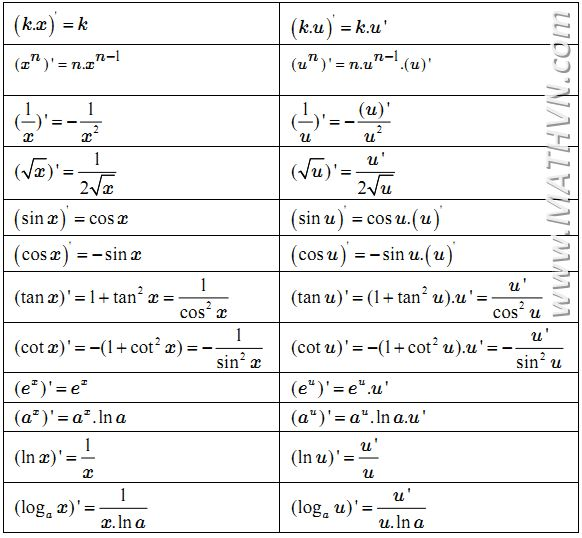

$f(x) = x^2-2x+5$ 

$f'(x) = 2x-2$

In [37]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [38]:
import numpy as np

def grad(x):
    return 2 * x - 2

def cost(x):
    return x**2 - 2*x + 5

def myGD1(eta, x0):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta * grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
    return x, it

# Áp dụng thuật toán GD để giải bài toán
(x1, it1) = myGD1(0.1, -5) #eta là learning rate t
(x2, it2) = myGD1(0.1, 5)

# In kết quả
print('Solution x1 = %f, cost = %f, obtained after %d iterations' % (x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations' % (x2[-1], cost(x2[-1]), it2))


Solution x1 = 0.999490, cost = 4.000000, obtained after 42 iterations
Solution x2 = 1.000532, cost = 4.000000, obtained after 40 iterations


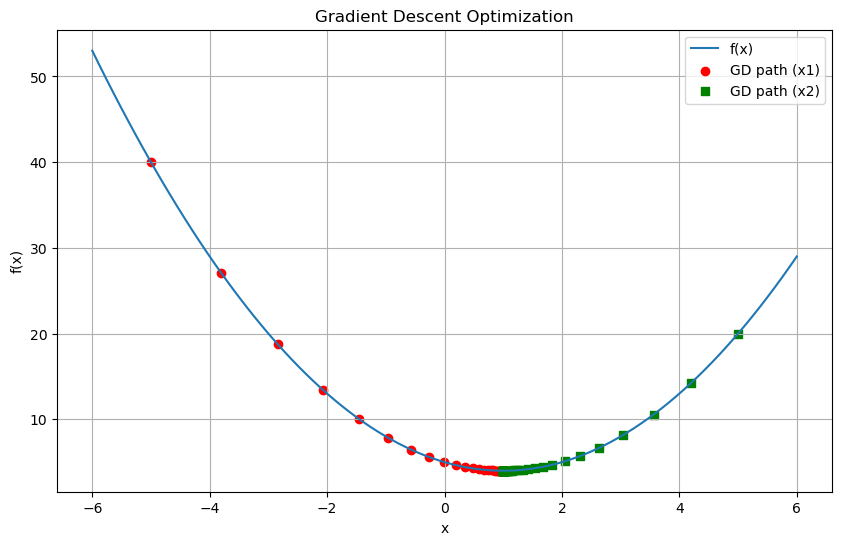

In [39]:
x = np.linspace(-6, 6, 100)
y = cost(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)')
plt.scatter(x1, [cost(xi) for xi in x1], c='r', marker='o', label='GD path (x1)')
plt.scatter(x2, [cost(xi) for xi in x2], c='g', marker='s', label='GD path (x2)')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Optimization')
plt.grid(True)
plt.show()

$$f_(x) =x^2 + 5sin_(x)$$

$$f_(x)' = 2x + 5cos_(x)$$

In [40]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
import matplotlib.pyplot as plt

In [41]:
def grad(x):
    return 2*x+ 5*np.cos(x)

def cost(x):
    return x**2 + 5*np.sin(x)

def myGD1(eta, x0):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
    return (x, it)

In [42]:
(x1, it1) = myGD1(.1, -5)
(x2, it2) = myGD1(.1, 5)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))

Solution x1 = -1.110667, cost = -3.246394, obtained after 11 iterations
Solution x2 = -1.110341, cost = -3.246394, obtained after 29 iterations


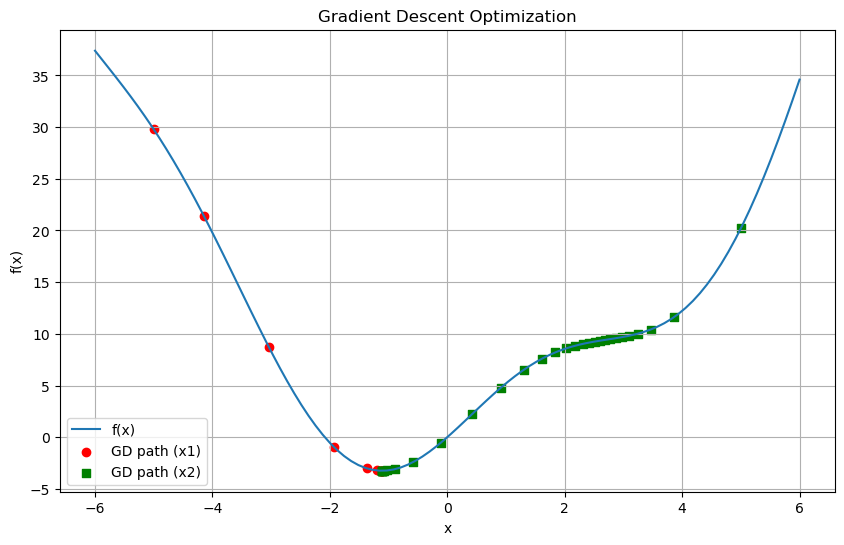

In [43]:
x = np.linspace(-6, 6, 100)
y = cost(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)')
plt.scatter(x1, [cost(xi) for xi in x1], c='r', marker='o', label='GD path (x1)')
plt.scatter(x2, [cost(xi) for xi in x2], c='g', marker='s', label='GD path (x2)')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Optimization')
plt.grid(True)
plt.show()

Gradient Descent (GD) cũng có thể được áp dụng cho các hàm nhiều biến, tức là hàm mà có nhiều hơn một biến đầu vào. Khi tối ưu hóa hàm nhiều biến bằng GD, chúng ta sẽ tính gradient của hàm đó đối với từng biến riêng lẻ và cập nhật các biến theo hướng âm của gradient.

Dưới đây là một ví dụ về cách áp dụng GD cho một hàm hai biến:

Hàm mục tiêu: $f(x, y) = x^2 + y^2$

Gradient của hàm mục tiêu: $\nabla f(x, y) = \begin{bmatrix}2x \\ 2y\end{bmatrix}$

Thuật toán GD cho hàm hai biến:

1. Chọn giá trị khởi tạo: $(x_0, y_0)$.
2. Lặp qua các bước sau cho đến khi tiêu chí dừng (ví dụ: gradient nhỏ hơn một ngưỡng nhất định):
   - Tính gradient tại điểm hiện tại: $\nabla f(x_i, y_i) = \begin{bmatrix}2x_i \\ 2y_i\end{bmatrix}$.
   - Cập nhật $(x, y)$ theo hướng âm của gradient:
     $$x_{i+1} = x_i - \eta \cdot \frac{\partial f}{\partial x}(x_i, y_i) = x_i - 2\eta x_i$$
     $$y_{i+1} = y_i - \eta \cdot \frac{\partial f}{\partial y}(x_i, y_i) = y_i - 2\eta y_i$$
   - Tăng số lượng lặp lên: $i = i + 1$.

Dưới đây là một ví dụ mã Python thực hiện GD cho hàm hai biến $f(x, y) = x^2 + y^2$:

```python

```

Mã này sẽ tối ưu hóa hàm $f(x, y) = x^2 + y^2$ bằng GD và in ra giá trị tối ưu của $(x, y)$ cùng với giá trị của hàm mất mát và số lần lặp.

In [44]:
import numpy as np

def gradient(x, y):
    grad_x = 2 * x
    grad_y = 2 * y
    return grad_x, grad_y

def cost(x, y):
    return x**2 + y**2

def gradient_descent(eta, x0, y0, max_iter=100, epsilon=1e-5):
    x = [x0]
    y = [y0]
    for i in range(max_iter):
        grad_x, grad_y = gradient(x[-1], y[-1])
        x_new = x[-1] - eta * grad_x
        y_new = y[-1] - eta * grad_y
        x.append(x_new)
        y.append(y_new)
        if np.sqrt(grad_x**2 + grad_y**2) < epsilon:
            break
    return x, y, i

# Áp dụng GD để tối ưu hóa hàm f(x, y)
x0, y0 = 3, 4  # Giá trị khởi tạo
eta = 0.1  # Learning rate
x, y, it = gradient_descent(eta, x0, y0)

# Kết quả
print('Solution (x, y) = (%f, %f), cost = %f, obtained after %d iterations' % (x[-1], y[-1], cost(x[-1], y[-1]), it))

Solution (x, y) = (0.000002, 0.000003), cost = 0.000000, obtained after 62 iterations


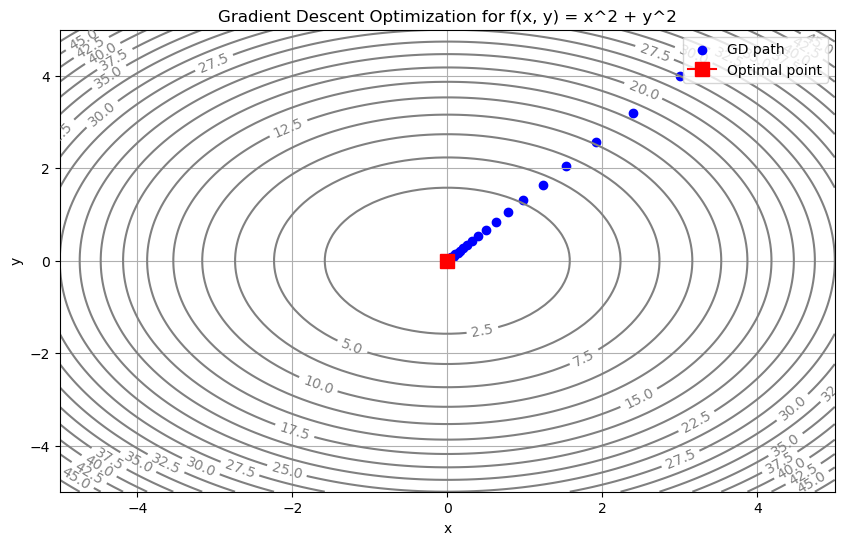

In [45]:


# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = X**2 + Y**2
contours = plt.contour(X, Y, Z, levels=20, colors='gray')
plt.clabel(contours, inline=1, fontsize=10)
plt.scatter(x, y, c='b', marker='o', label='GD path')
plt.plot(x[-1], y[-1], marker='s', markersize=10, c='r', label='Optimal point')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Optimization for f(x, y) = x^2 + y^2')
plt.legend()
plt.grid(True)
plt.show()


Dưới đây là một ví dụ về cách áp dụng Gradient Descent cho một hàm nhiều biến khác:

Hàm mục tiêu: $f(\mathbf{x}) = x_1^2 + 3x_2^2 - 2x_1x_2$

Gradient của hàm mục tiêu: $\nabla f(\mathbf{x}) = \begin{bmatrix} 2x_1 - 2x_2 \\ 6x_2 - 2x_1 \end{bmatrix}$

Thuật toán GD cho hàm hai biến:

1. Chọn giá trị ban đầu cho vector $\mathbf{x}$: $\mathbf{x}_0$.
2. Lặp qua các bước sau cho đến khi tiêu chí dừng (ví dụ: gradient nhỏ hơn một ngưỡng nhất định):
   - Tính gradient tại điểm hiện tại: $\nabla f(\mathbf{x}_i)$.
   - Cập nhật vector $\mathbf{x}$ theo hướng âm của gradient:
     $$\mathbf{x}_{i+1} = \mathbf{x}_i - \eta \nabla f(\mathbf{x}_i)$$
   - Tăng số lượng lặp lên: $i = i + 1$.

Dưới đây là ví dụ mã Python để tối ưu hóa hàm này:

Solution (x, y) = [1.54048325e-05 6.38089055e-06]
Cost = 1.6286305685127545e-10
Obtained after 100 iterations


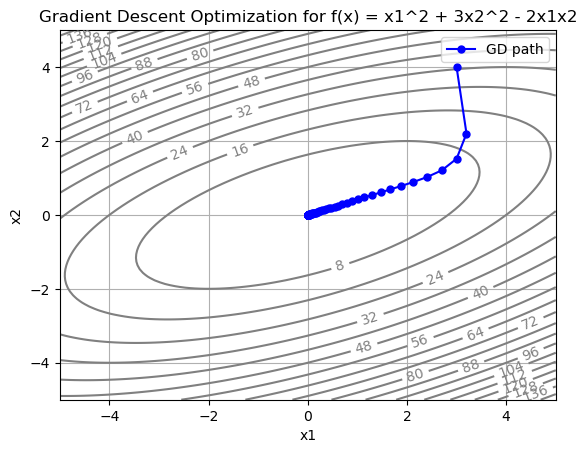

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def gradient(x):
    grad = np.array([2 * x[0] - 2 * x[1], 6 * x[1] - 2 * x[0]])
    return grad

def cost(x):
    return x[0]**2 + 3 * x[1]**2 - 2 * x[0] * x[1]

def gradient_descent(eta, x0, max_iter=100, epsilon=1e-5):
    x = [x0]
    for i in range(max_iter):
        grad = gradient(x[-1])
        x_new = x[-1] - eta * grad
        x.append(x_new)
        if np.linalg.norm(grad) < epsilon:
            break
    return x

# Áp dụng GD để tối ưu hóa hàm f(x)
x0 = np.array([3, 4])  # Giá trị khởi tạo (vector)
eta = 0.1  # Learning rate
x_opt = gradient_descent(eta, x0)

# Kết quả
final_x = x_opt[-1]
final_cost = cost(final_x)
iterations = len(x_opt) - 1
print('Solution (x, y) =', final_x)
print('Cost =', final_cost)
print('Obtained after', iterations, 'iterations')

# Vẽ biểu đồ
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = X**2 + 3 * Y**2 - 2 * X * Y
contours = plt.contour(X, Y, Z, levels=20, colors='gray')
plt.clabel(contours, inline=1, fontsize=10)
x_path = [point[0] for point in x_opt]
y_path = [point[1] for point in x_opt]
plt.plot(x_path, y_path, marker='o', markersize=5, label='GD path', color='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gradient Descent Optimization for f(x) = x1^2 + 3x2^2 - 2x1x2')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
import sympy as sp 
x = sp.Symbol('x')
y =  x**2 -2*x+5
y1= y.diff(x)
print(y1)

2*x - 2


In [48]:
import sympy as sp

# Định nghĩa biến ký hiệu
x1, x2 = sp.symbols('x1 x2')

# Định nghĩa hàm
f = x1**2 + 3*x2**2 - 2*x1*x2

# Tính đạo hàm theo từng biến riêng lẻ
df_dx1 = sp.diff(f, x1)
df_dx2 = sp.diff(f, x2)

print('Đạo hàm theo x1:', df_dx1)
print('Đạo hàm theo x2:', df_dx2)


Đạo hàm theo x1: 2*x1 - 2*x2
Đạo hàm theo x2: -2*x1 + 6*x2
